In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib  inline

In [5]:
df=pd.read_csv("housing_prices_SLR.csv",delimiter=',')

In [6]:
df.head()

,AREA,PRICE
0,1000,5618
1,1030,5201
2,1060,4779
3,1090,5425
4,1120,5657


In [7]:
df.AREA

0     1000
1     1030
2     1060
3     1090
4     1120
5     1150
6     1180
7     1210
8     1240
9     1270
10    1300
11    1330
12    1360
13    1390
14    1420
15    1450
16    1480
17    1510
18    1540
19    1570
20    1600
21    1630
22    1660
23    1690
24    1720
25    1750
26    1780
27    1810
28    1840
29    1870
30    1900
31    1930
32    1960
33    1990
34    2020
35    2050
36    2080
37    2110
38    2140
39    2170
40    2200
41    2230
42    2260
43    2290
44    2320
45    2350
46    2380
47    2410
48    2440
49    2470
Name: AREA, dtype: int64

In [8]:
df.PRICE

0      5618
1      5201
2      4779
3      5425
4      5657
5      4945
6      6475
7      5352
8      6290
9      6147
10     7718
11     7035
12     8712
13     9457
14     7304
15     7535
16     9968
17     7614
18     9762
19    10067
20     8074
21    10201
22    10051
23     9775
24    10229
25     8314
26     9288
27    10503
28     9763
29    11527
30     9912
31    10204
32     9085
33    10240
34    15220
35    12278
36    22270
37    12574
38    12618
39    15457
40    12793
41    12641
42    17207
43    16969
44    16293
45    16845
46    17604
47    17310
48    14036
49    13699
Name: PRICE, dtype: int64

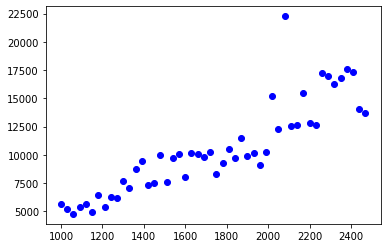

In [9]:
plt.scatter(df.AREA,df.PRICE,c='blue')
plt.show()

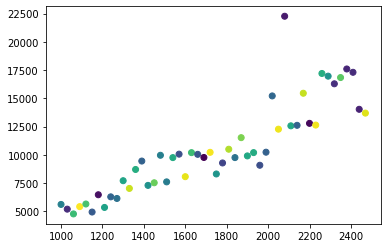

In [10]:
plt.scatter(df.AREA,df.PRICE,c=np.random.random(df.shape[0]))
#numpy.random.rand(d0, d1, ..., dn)
#Random values in a given shape.

#Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).

#Parameters:	
#d0, d1, …, dn : int, optional
#The dimensions of the returned array, should all be positive. If no argument is given a single Python float is returned.

#Returns:	
#out : ndarray, shape (d0, d1, ..., dn)
#Random values.
plt.show()

In [11]:
df.shape
col=np.random.random(df.shape[0])
col

array([0.10634188, 0.16563777, 0.14503402, 0.13639087, 0.82074418,
       0.18264904, 0.97519293, 0.51212911, 0.24108107, 0.68988698,
       0.82408595, 0.72270876, 0.22790888, 0.42631207, 0.81295147,
       0.77479926, 0.49397003, 0.45672806, 0.36784443, 0.38444594,
       0.98368321, 0.12814245, 0.83414012, 0.86715922, 0.38772276,
       0.26421618, 0.94485088, 0.9481993 , 0.89664737, 0.82491722,
       0.44419297, 0.95252284, 0.82126868, 0.42102365, 0.5062313 ,
       0.39447786, 0.97905486, 0.23926534, 0.24227043, 0.9168363 ,
       0.47774745, 0.22477717, 0.87770973, 0.85380753, 0.87090329,
       0.2767482 , 0.87009629, 0.72079369, 0.86422915, 0.03620505])

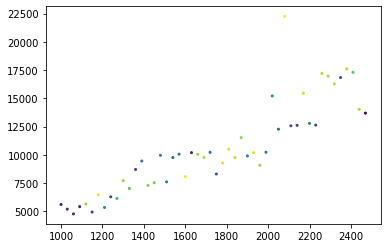

In [12]:
plt.scatter(df.AREA,df.PRICE,c=col,s=4)
plt.show()

# Step3:Feature matrix and Target vector

In [13]:
x=df[['AREA']].values#feature Matrix
y=df.PRICE.values#Target Matrix

In [14]:
x[:5] #slicing
y[:5]

array([5618, 5201, 4779, 5425, 5657], dtype=int64)

In [15]:
print(x[:5]) #slicing
print(y[:5])

[[1000]
 [1030]
 [1060]
 [1090]
 [1120]]
[5618 5201 4779 5425 5657]


# step4:Split the data into 80-20

In [26]:
#from packagename import function
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100) #80 20 split,random_state to reproduce the same split everytime

In [28]:
print(x_train.shape)
print(x_test.shape)
print(x_train.shape)
print(x_test.shape)

(40, 1)
(10, 1)
(40, 1)
(10, 1)


# step5: Fit the line:Train the SLR Model

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr_model= LinearRegression()

In [31]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [32]:
print(lr_model.intercept_) # (PRICE=(-4481.80028058845)+8.65903854)*AREA
print(lr_model.coef_)#y=c+mx

-3103.34066448488
[7.75979089]


In [33]:
lr_model=LinearRegression(fit_intercept= False)

In [34]:
lr_model.fit(x_train,y_train)

LinearRegression(fit_intercept=False)

In [35]:
print(lr_model.intercept_) # (PRICE=(-4481.80028058845)+8.65903854)*AREA
print(lr_model.coef_)#y=c+mx

0.0
[6.03609138]


# step6:predict using the model

In [36]:
lr_model.predict(np.array([[2000],[2500]]))

array([12072.18276042, 15090.22845052])

In [37]:
from sklearn.metrics import r2_score

In [38]:
y_train

array([ 5618,  7035,  9762, 16845, 12618,  8314,  9288, 12278,  7614,
        5352, 17310, 10204,  9085, 10067, 10201,  9457,  5201,  5657,
        8712, 10503, 12793, 10051, 11527,  6147,  9968, 16293, 14036,
       17604,  7304, 12641,  4779, 15220,  9912,  7718,  7535,  9775,
       15457,  5425, 10229,  6290], dtype=int64)

In [39]:
lr_model.predict(x_train)

array([ 6036.09138021,  8028.00153568,  9295.58072552, 14184.81474349,
       12917.23555365, 10563.15991537, 10744.24265677, 12373.98732943,
        9114.49798412,  7303.67057005, 14546.9802263 , 11649.6563638 ,
       11830.73910521,  9476.66346693,  9838.82894974,  8390.16701849,
        6217.17412162,  6760.42234583,  8209.08427708, 10925.32539818,
       13279.40103646, 10019.91169115, 11287.49088099,  7665.83605287,
        8933.41524271, 14003.73200208, 14728.06296771, 14365.8974849 ,
        8571.2497599 , 13460.48377787,  6398.25686302, 12192.90458802,
       11468.5736224 ,  7846.91879427,  8752.3325013 , 10200.99443255,
       13098.31829505,  6579.33960443, 10382.07717396,  7484.75331146])

# step7:calculating R^2score using tain and test model

In [40]:
r2_score(y_train,lr_model.predict(x_train))  # 1.First way of calculating R2 score

0.820250203127675

In [41]:
r2_score(y_test,lr_model.predict(x_test))

0.5059420550739799

In [42]:
lr_model.score(x_test,y_test) #2.second way of calculating R2 score

0.5059420550739799

# step8:Visualizing the model

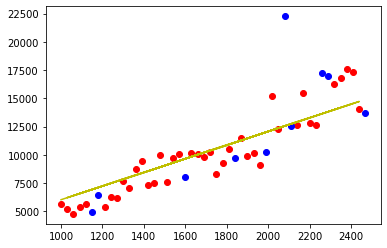

In [43]:
plt.scatter(x_train[:,0],y_train,c='red')
plt.scatter(x_test[:,0],y_test,c='blue')
plt.plot(x_train[:,0],lr_model.predict(x_train),c='y')

In [44]:
!pip install sklearn